In [1]:
import sqlite3


conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create a table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
sample_data = [
    ('Shoes', 10, 50.0),
    ('Shirts', 20, 25.0),
    ('Pants', 15, 40.0),
    ('Shoes', 5, 50.0),
    ('Shirts', 10, 25.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()


In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")


In [3]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


In [4]:
import pandas as pd

df = pd.read_sql_query(query, conn)
print(df)


  product  total_qty  revenue
0   Pants         15    600.0
1  Shirts         30    750.0
2   Shoes         15    750.0


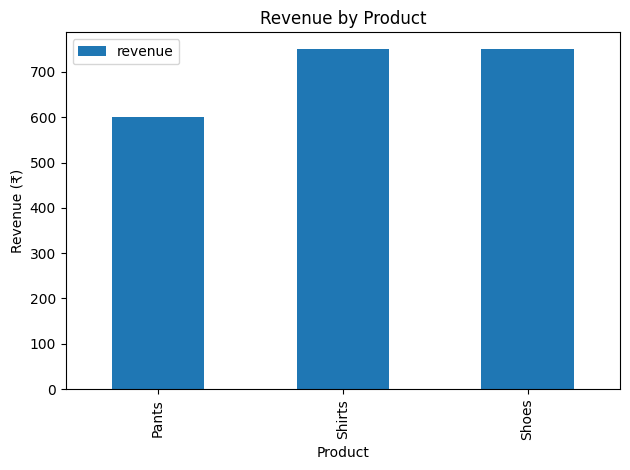

In [5]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product')
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save image
plt.show()
